In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def rename_columns(df):
     new_names = [col.split()[-1]for col in df.columns[3:20]]
     keys = df.columns[3:20]
     values = new_names
     dictionary = dict(zip(keys,values))
     dictionary['Wiek nieustalony'] = 'unknown'
     dictionary['Liczba osób w zamachach samobójczych zakończonych zgonem'] = 'total'
     df = df.rename(columns = dictionary)
     return df

In [134]:
def plot_suicides_per_group(df, cols, idx_name, legend_loc):
    cmap = plt.cm.get_cmap('tab20', 14)  # Use 'tab20' with 14 unique colors
    for i, col in enumerate(cols):
        plt.plot(df[idx_name], df[col], marker='o', label=col, color=cmap(i))
    plt.legend(loc='upper left', bbox_to_anchor=legend_loc)
    plt.xlabel('Year')
    plt.ylabel('Number of suicides')
    plt.tight_layout()

In [6]:
def remove_category_from_column_name(df, split_sep):
    new_names = [col.split(split_sep)[1].lower() for col in df.iloc[:,1:].columns]
    keys = df.iloc[:,1:].columns
    values = new_names
    dictionary = dict(zip(keys,values))
    df = df.rename(columns=dictionary)
    return df

## age

In [7]:
age = pd.read_excel('demo_wiek.xlsx')
age = age.dropna()
age = age[['Płeć', 'Pięcioletnie grupy wieku', 'Wartość']]

all = age[age['Płeć'] == "Ogółem"]
women = age[age['Płeć'] == "Kobiety"]
men = age[age['Płeć'] == "Mężczyźni"]

people_count = all['Wartość'].sum()
men_count= men['Wartość'].sum()
women_count = women['Wartość'].sum()

people_count, women_count, men_count

(np.float64(37636508.0), np.float64(19454109.0), np.float64(18182399.0))

In [8]:
age = pd.read_excel('wiek.xlsx')
age_pol = age[age['KWP'] == 'Polska']
age_data = rename_columns(age_pol)
age_data = age_data.loc[:,: 'unknown']
age_data = age_data[age_data['Rok'] >= 2021]
age_data.drop(columns=['KWP'], inplace=True)
age_data.columns = list(age_data.columns[:2]) + age_data.columns[2:-1].str.strip("'").tolist() + list(age_data.columns[-1:])
age_data

,Rok,total,0-6,7-12,13-18,19-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85+,unknown
89,2021,5201,0,2,125,344,384,467,505,492,465,409,466,454,378,282,141,136,135,16
107,2022,5108,0,6,150,317,356,476,510,465,445,426,428,466,363,262,175,128,128,7
125,2023,5233,0,7,138,304,390,471,534,553,507,417,428,469,341,258,181,109,119,7


In [121]:
age_PL = pd.read_csv('age_structure.csv', index_col=0)
age_PL.head()

,0-6,7-12,13-18,19-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85+
year,,,,,,,,,,,,,,,,,
2021,2640713,2441104,2254232,2230589,2274032,2732843,3188086,3082559,2785620,2303011,2244838,2554935,2494976,1985625,1072017,829368,793156
2022,2560544,2398469,2341670,2171202,2176867,2657137,3103931,3121806,2864415,2364564,2208012,2444255,2513554,2053284,1186305,801434,798878
2023,2438726,2369027,2418796,2135906,2083051,2573966,2990800,3177592,2929547,2443343,2182033,2343827,2519590,2108909,1320176,784361,816858


In [10]:
def calculate_proportion(col, df_pop):
    interval = col.name
    population_in_interval = df_pop.loc[:,interval]
    proportion = col.values / population_in_interval.values
    return proportion

In [21]:
age_proportion = age_data.copy()
cols_to_change = age_proportion.columns[2:-1]
age_proportion[cols_to_change] = age_proportion[cols_to_change].astype(float)
age_proportion['Rok'] = age_proportion['Rok'].astype(str)
age_proportion.iloc[:,2:-1] = age_proportion.iloc[:,2:-1].apply(calculate_proportion, axis=0, args=(age_PL,))

In [22]:
age_proportion

,Rok,total,0-6,7-12,13-18,19-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85+,unknown
89,2021,5201,0.0,8.193014e-07,0.000055,0.000154,0.000169,0.000171,0.000158,0.000160,0.000167,0.000178,0.000208,0.000178,0.000152,0.000142,0.000132,0.000164,0.000170,16
107,2022,5108,0.0,2.501596e-06,0.000064,0.000146,0.000164,0.000179,0.000164,0.000149,0.000155,0.000180,0.000194,0.000191,0.000144,0.000128,0.000148,0.000160,0.000160,7
125,2023,5233,0.0,2.954800e-06,0.000057,0.000142,0.000187,0.000183,0.000179,0.000174,0.000173,0.000171,0.000196,0.000200,0.000135,0.000122,0.000137,0.000139,0.000146,7


C:\Users\wypyc\AppData\Local\Temp\ipykernel_7916\3145404912.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20', 14)  # Use 'tab20' with 14 unique colors


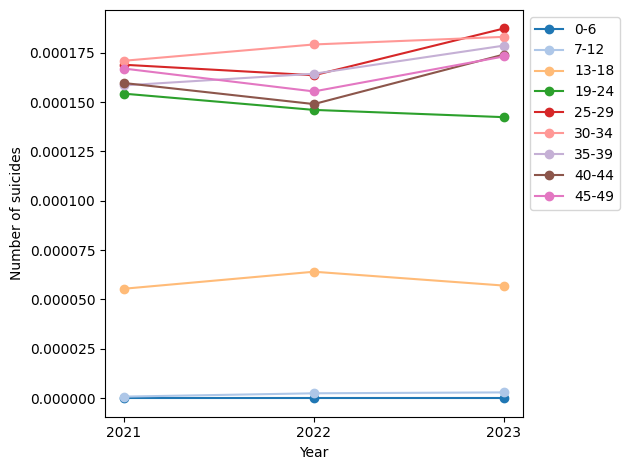

In [135]:
plot_suicides_per_group(age_proportion, age_proportion.columns[2:11], 'Rok', (1,1))

C:\Users\wypyc\AppData\Local\Temp\ipykernel_7916\3145404912.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20', 14)  # Use 'tab20' with 14 unique colors


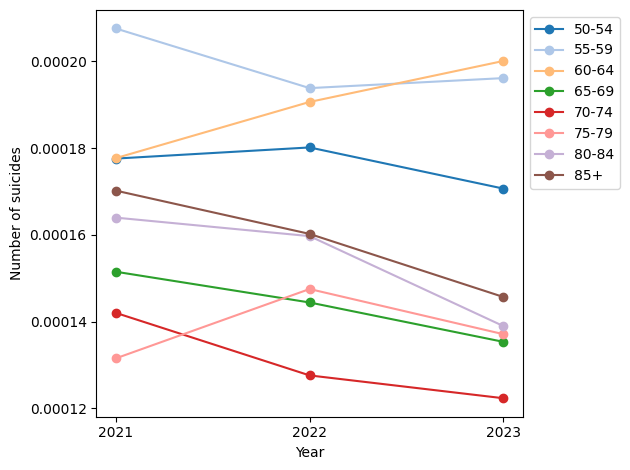

In [136]:
plot_suicides_per_group(age_proportion, age_proportion.columns[11:-1], 'Rok', (1,1))


C:\Users\wypyc\AppData\Local\Temp\ipykernel_7916\3145404912.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20', 14)  # Use 'tab20' with 14 unique colors


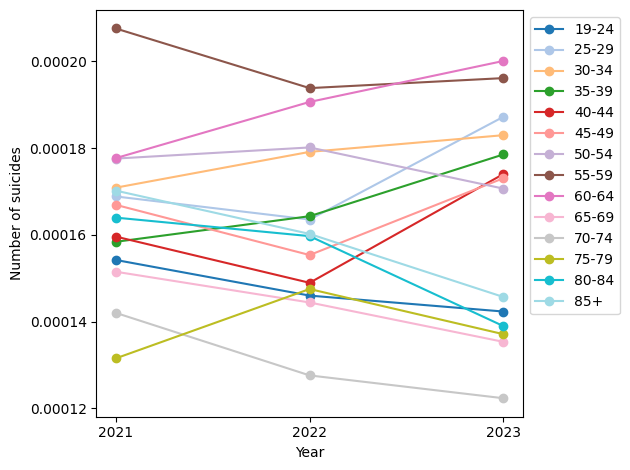

In [137]:
plot_suicides_per_group(age_proportion, age_proportion.columns[5:-1], 'Rok', (1,1))

we can assume that being between 18 and 70 increases the probability of suicide

In [138]:
age_data_10 = pd.DataFrame()
age_data_10['year'] = ['2021', '2022', '2023']
sum1 = age_data.iloc[:,2] + age_data.iloc[:,3] + age_data.iloc[:,4]
age_data_10['0-18'] = sum1.to_list()
for i in range(5, 18, 2):
    sum_ = age_data.iloc[:,i] + age_data.iloc[:,i+1]
    age_data_10[str(i)] = sum_.to_list()
    
age_data_10.columns= ['year', '0-18', '19-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
age_data_10
age_data_10

,year,0-18,19-29,30-39,40-49,50-59,60-69,70-79,80+
0,2021,127,728,972,957,875,832,423,271
1,2022,156,673,986,910,854,829,437,256
2,2023,145,694,1005,1060,845,810,439,228


In [139]:
age_PL_10 = pd.DataFrame()
age_PL_10['year'] = ['2021', '2022', '2023']
sum1 = age_PL.iloc[:,0] + age_PL.iloc[:,1] + age_PL.iloc[:,2]
age_PL_10['0-18'] = sum1.to_list()
for i in range(3, 16, 2):
    sum_ = age_PL.iloc[:,i] + age_PL.iloc[:,i+1]
    age_PL_10[str(i)] = sum_.to_list()
age_PL_10.columns= ['year', '0-18', '19-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
age_PL_10

,year,0-18,19-29,30-39,40-49,50-59,60-69,70-79,80+
0,2021,7336049,4504621,5920929,5868179,4547849,5049911,3057642,1622524
1,2022,7300683,4348069,5761068,5986221,4572576,4957809,3239589,1600312
2,2023,7226549,4218957,5564766,6107139,4625376,4863417,3429085,1601219


In [140]:
age_proportion_10 = age_data_10.copy()
cols_to_change = age_proportion_10.columns[1:]
age_proportion_10[cols_to_change] = age_proportion_10[cols_to_change].astype(float)
age_proportion_10['year'] = age_proportion_10['year'].astype(str)
age_proportion_10.iloc[:,1:] = age_proportion_10.iloc[:,1:].apply(calculate_proportion, axis=0, args=(age_PL_10,))

age_proportion_10

,year,0-18,19-29,30-39,40-49,50-59,60-69,70-79,80+
0,2021,0.000017,0.000162,0.000164,0.000163,0.000192,0.000165,0.000138,0.000167
1,2022,0.000021,0.000155,0.000171,0.000152,0.000187,0.000167,0.000135,0.000160
2,2023,0.000020,0.000164,0.000181,0.000174,0.000183,0.000167,0.000128,0.000142


C:\Users\wypyc\AppData\Local\Temp\ipykernel_7916\3145404912.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20', 14)  # Use 'tab20' with 14 unique colors


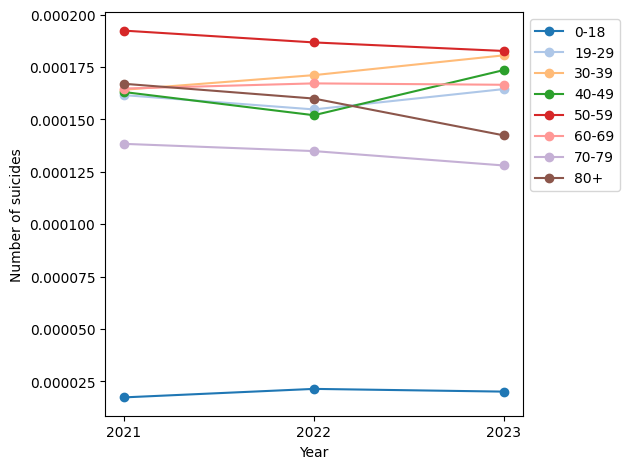

In [141]:
plot_suicides_per_group(age_proportion_10, age_proportion_10.columns[1:], 'year', (1,1))

## gender, marital status, education, work

In [221]:
gmew = pd.read_excel('cywil_wykszt_praca.xlsx') #gender, marital_status, education, work
gmew = gmew[gmew['KWP'] == 'Polska']
gmew = gmew.rename(columns={'Liczba osób w zamachach samobójczych zakończonych zgonem':'total',
                            'W tym mężczyzn': 'men',
                            'W tym kobiet': 'women'})

gender = gmew.iloc[:,:6]
marital_status = gmew.iloc[:,[0] + list(range(6,13))]
edu = gmew.iloc[:,[0]  + list(range(13,21))]
work = gmew.iloc[:,[0] + list(range(21,gmew.shape[1]))]

In [222]:
gender = gender.rename(columns={'W tym mężczyzn': 'men',
                                'W tym kobiet': 'women',
                                'Nieokreślona płeć': 'unknown'})
gender.drop(columns=['KWP','unknown','total'], inplace=True)
gender = gender[gender['Rok'] >= 2021]
gender.index = range(len(gender))

In [264]:
gender

,Rok,men,women
0,2021,4413,787
1,2022,4261,847
2,2023,4404,829


In [265]:
gender_PL = pd.read_csv('gender_structure.csv')
gender_PL

,year,men,women
0,2021,18322917,19584787
1,2022,18249321,19517006
2,2023,18182399,19454109


In [224]:
gender_proportion = gender.iloc[:,1:] / gender_PL.iloc[:,1:]
gender_proportion.insert(0, 'year', gender_PL['year'])
gender_proportion['year'] = gender_proportion['year'].astype(str)
gender_proportion

,year,men,women
0,2021,0.000241,0.000040
1,2022,0.000233,0.000043
2,2023,0.000242,0.000043


C:\Users\wypyc\AppData\Local\Temp\ipykernel_7916\3145404912.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20', 14)  # Use 'tab20' with 14 unique colors


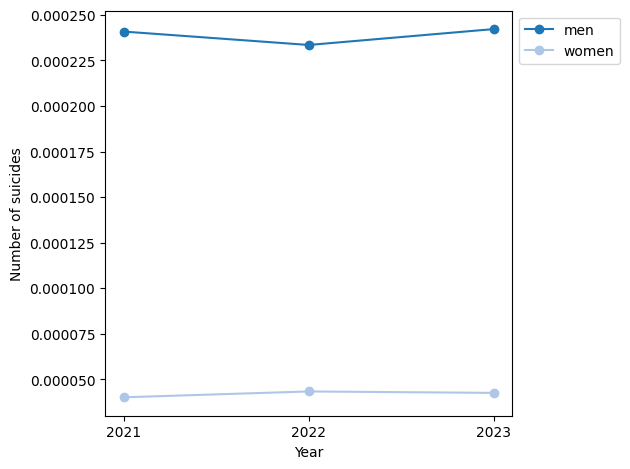

In [225]:
plot_suicides_per_group(gender_proportion, gender_proportion.columns[1:], 'year', (1,1))

being a men increases the probability of suicide

In [198]:
marital_status = remove_category_from_column_name(marital_status, '  - ')
#plot_suicides_per_group(marital_status, marital_status.iloc[:,1:], (0,0))
marital_status

,Rok,kawaler/panna,żonaty/zamężna,konkubin(a),wdowiec/wdowa,rozwiedziony(a),separowany(a),brak danych/nieustalony
17,2017,1672,2013,216,371,466,21,517
35,2018,1586,1999,203,359,440,32,563
53,2019,1670,1973,212,376,465,24,535
71,2020,1710,1893,193,364,442,22,541
89,2021,1737,1866,187,333,457,28,593
107,2022,1646,1865,188,346,415,16,632
125,2023,1710,1854,191,324,468,19,667


In [233]:
edu = edu.rename(columns={'Wykształcenie -Brak danych/nieustalone': 'Wykształcenie - Brak danych/nieustalone'})
edu = remove_category_from_column_name(edu, ' - ')
#plot_suicides_per_group(edu, edu.iloc[:,1:], (0,0))
edu

,Rok,podstawowe niepełne,podstawowe,gimnazjalne,zasadnicze zawodowe,średnie,policealne,wyższe,brak danych/nieustalone
17,2017,31,392,93,558,378,3,132,3689
35,2018,29,324,78,467,380,3,130,3771
53,2019,20,312,59,465,356,4,138,3901
71,2020,21,314,60,466,368,4,162,3770
89,2021,27,302,56,451,400,2,152,3811
107,2022,34,299,49,439,408,6,131,3742
125,2023,21,329,44,413,407,6,182,3831


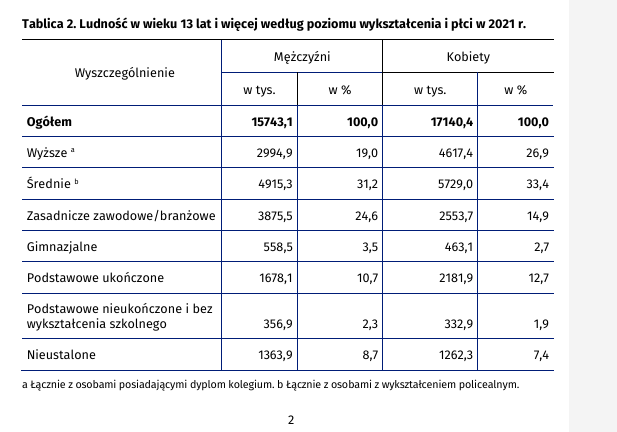

In [234]:
edu

,Rok,podstawowe niepełne,podstawowe,gimnazjalne,zasadnicze zawodowe,średnie,policealne,wyższe,brak danych/nieustalone
17,2017,31,392,93,558,378,3,132,3689
35,2018,29,324,78,467,380,3,130,3771
53,2019,20,312,59,465,356,4,138,3901
71,2020,21,314,60,466,368,4,162,3770
89,2021,27,302,56,451,400,2,152,3811
107,2022,34,299,49,439,408,6,131,3742
125,2023,21,329,44,413,407,6,182,3831


In [235]:
edu_PL = pd.DataFrame(columns=edu.columns)
edu_row = ['2021', 689.8 * 10**3, 3860 * 10**3, 1021.6 * 10**3, 6429.2 * 10**3, 10644.3 * 10**3, None, 7612.3 * 10**3, None]
edu_PL.loc[0] = edu_row
edu_PL

,Rok,podstawowe niepełne,podstawowe,gimnazjalne,zasadnicze zawodowe,średnie,policealne,wyższe,brak danych/nieustalone
0,2021,689800.0,3860000,1021600.0,6429200.0,10644300.0,None,7612300.0,None


In [252]:
edu_proportion = edu_PL.copy()
cols_to_change = edu_proportion.columns[1:]
edu_proportion[cols_to_change] = edu_proportion[cols_to_change].astype(float)
edu_proportion.iloc[:,0] = edu_proportion.iloc[:,0].astype(str)
edu2021 = edu[edu['Rok'] == 2021]
edu2021.iloc[:,[1,2,3,4,5,7]].values / edu_PL.iloc[:,[1,2,3,4,5,7]].values
edu_proportion.iloc[:,[1,2,3,4,5,7]] = edu2021.iloc[:,[1,2,3,4,5,7]].values / edu_PL.iloc[:,[1,2,3,4,5,7]].values
edu_proportion

,Rok,podstawowe niepełne,podstawowe,gimnazjalne,zasadnicze zawodowe,średnie,policealne,wyższe,brak danych/nieustalone
0,2021,0.000039,0.000078,0.000055,0.00007,0.000038,NaN,0.00002,NaN


C:\Users\wypyc\AppData\Local\Temp\ipykernel_7916\3145404912.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20', 14)  # Use 'tab20' with 14 unique colors


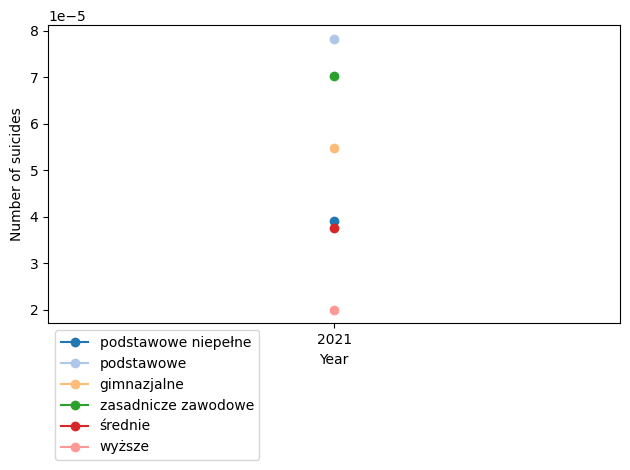

In [255]:
plot_suicides_per_group(edu_proportion.iloc[:,[0,1,2,3,4,5,7]], edu_proportion.iloc[:,[1,2,3,4,5,7]], 'Rok', (0,0))

In [200]:
edu_2021_PL = 32825887

In [ ]:
plot_suicides_per_group(edu.iloc[:,:-1], edu.iloc[:,1:-1], (0,0))

In [256]:
work = remove_category_from_column_name(work, ' - ')
#plot_suicides_per_group(work, work.iloc[:,1:], (0,0))
work

,Rok,praca stała,praca dorywcza,pracujący na własny rachunek/samodzielna działalność gospodarcza,rolnik,uczeń,student,bezrobotny,brak danych/nieustalono
17,2017,711,403,156,204,119,44,1024,2615
35,2018,727,377,136,227,102,39,882,2692
53,2019,718,361,151,187,93,42,827,2876
71,2020,753,333,124,186,113,31,886,2739
89,2021,759,384,160,168,126,43,793,2768
107,2022,725,359,140,159,150,35,746,2794
125,2023,818,350,167,165,140,36,830,2727


In [ ]:
plot_suicides_per_group(work.iloc[:,:-1], work.iloc[:,1:-1], (0,0))

## livelihood, consciousness, health

In [258]:
lch = pd.read_excel('utrzymanie_swiadomosc_zdrowie.xlsx') #livelihood, consciousness, health
lch = lch[lch['KWP'] == 'Polska']
lch = lch.rename(columns={'Liczba osób w zamachach samobójczych zakończonych zgonem':'total'})

In [259]:
livelihood = lch.iloc[:,[0] + list(range(6,13))]
consciousness = lch.iloc[:,[0] + list(range(13,19))]
health = lch.iloc[:,[0] + list(range(19,30))]

In [260]:
livelihood = remove_category_from_column_name(livelihood, ' - ')  
consciousness = remove_category_from_column_name(consciousness, ' * - ')
health = remove_category_from_column_name(health, ' * - ')

In [263]:
health

,Rok,choroba fizyczna,trwałe kalectwo,leczony(a) psychiatrycznie,leczony(a) z powodu alkoholizmu,nadużywał(a) alkoholu,leczony(a) z powodu narkomanii,zatrzymywany(a) w izbie wytrzeźwień,miał(a) sprawę(y) w komisji ds. przeciwdziałania alkoholizmowi,używał narkotyków,używał dopalaczy,brak danych/nieustalono
17,2017,284.0,45.0,1096.0,193.0,1060.0,27.0,14.0,7.0,60.0,21.0,2798.0
35,2018,326.0,47.0,1051.0,176.0,1009.0,24.0,5.0,9.0,60.0,14.0,2732.0
53,2019,333.0,46.0,1006.0,178.0,944.0,26.0,8.0,7.0,56.0,13.0,2925.0
71,2020,341.0,35.0,1046.0,162.0,950.0,19.0,7.0,8.0,57.0,12.0,2773.0
89,2021,317.0,37.0,1041.0,175.0,906.0,17.0,10.0,7.0,69.0,8.0,2855.0
107,2022,346.0,31.0,1074.0,157.0,877.0,16.0,4.0,4.0,62.0,8.0,2730.0
125,2023,327.0,48.0,1128.0,177.0,886.0,19.0,3.0,11.0,94.0,7.0,2806.0
